                                         #### Strategic Capstone Project on No Show to Appointment ####

------------------

Class Code and Name :- DSC 789-001 - Strategic Capstone Projects

​ Professor :- Zahra Sedighi Maman

​ Student Name :- Sandra Cordoba de andrade, Thanh huyen Dau, Lauren Toland, Sai Pranay Tummala and Jeongseok Yu.

​ Assignment No./Name :- Project Assignment - Week 7

​ Date of Creation :- 05/07/2025

--------

# Contents:-
## (I). Importing the Libraries.

## (II). CRISP - DM (from Phase - 3 :- Data Preparation)

###        (i). Data Preparation
####          - Separating Numerical and Categorical Columns
####          - Detecting and Handling the Outliers
####          - One-hot Encoding and Integer Encoding

###        (ii). Modeling
####           - Splitting up the Data into Training and Testing Sets
####           - Selecting the Best Analytical Model + Best Resampling Technique + LASSO as the Feature Importance Method.

###        (iii). Evaluation and Deployment
####            ** Best Model (XGBoost + Class Weight + LASSO)
####            - Classification report (Confusion Matrix and Evaluation Metrics)
####            - Extract Non-Zero LASSO Coefficients
####            - Creating a Bar Plot of LASSO Coefficients
####            - Summary Stats + Plots

# Note :- In the final code (below), we've used the "#" symbol to comment out the print() statements. This was done to focus on the visual output (plots). Please feel free to remove the "#" from those lines if you'd like to view the values or debug the code further.

------------

# (I). Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

-----------

# (II). CRISP - DM (from Phase - 3 :- Data Preparation)

## (i). Data Preparation

In [ ]:
df = pd.read_csv("No show to Appointment.csv")

print(df.info())
print("\n")
print("Identifying Null-Values if any :-\n\n",df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72607 entries, 0 to 72606
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PatientId                     72607 non-null  int64  
 1   AppointmentID                 72607 non-null  int64  
 2   Age                           72607 non-null  int64  
 3   Gender                        72607 non-null  object 
 4   ScheduledDay                  72607 non-null  object 
 5   AppointmentDay                72607 non-null  object 
 6   Month                         72607 non-null  int64  
 7   Calling_time (hour in a day)  72607 non-null  int64  
 8   Waiting_time (minute)         72607 non-null  int64  
 9   Financial_aid                 72607 non-null  int64  
 10  Hypertension                  72607 non-null  int64  
 11  Diabetes                      72607 non-null  int64  
 12  Alcoholism                    72607 non-null  int64  
 13  H

------------------

## - Separating Numerical and Categorical Columns

In [ ]:
num_col = ['Age', 'Month', 'Calling_time (hour in a day)', 'Waiting_time (minute)', 'Financial_aid', 'Hypertension', 'Diabetes', 'Alcoholism',
           'Handicap', 'SMS_received', 'Time_b_appointment (day)', 'Prior_noshow']

cat_col = ['Gender', 'ScheduledDay', 'AppointmentDay', 'Show.up']

cat_col1 = ['ScheduledDay', 'AppointmentDay']

num_df = df[num_col]
cat_df = df[cat_col]
cat_df1 = df[cat_col1]

#for col in num_df:
#    print("\n"f"{col}: {num_df[col].unique()}")

-----------------------------------

## - Detecting the Outliers

In [ ]:
num_df['Handicap'] = num_df['Handicap'].apply(lambda x: 1 if x > 0 else 0)
#print(f"{'Handicap'}: {num_df['Handicap'].unique()}")
#print(num_df['Handicap'].unique())

Q1_age = num_df['Age'].quantile(0.25)
Q3_age = num_df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

Q1_callingTime = num_df['Calling_time (hour in a day)'].quantile(0.25)
Q3_callingTime = num_df['Calling_time (hour in a day)'].quantile(0.75)
IQR_callingTime = Q3_callingTime - Q1_callingTime

Q1_wt = num_df['Waiting_time (minute)'].quantile(0.25)
Q3_wt = num_df['Waiting_time (minute)'].quantile(0.75)
IQR_wt = Q3_wt - Q1_wt

Q1_tb = num_df['Time_b_appointment (day)'].quantile(0.25)
Q3_tb = num_df['Time_b_appointment (day)'].quantile(0.75)
IQR_tb = Q3_tb - Q1_tb

Q1_pns = num_df['Prior_noshow'].quantile(0.25)
Q3_pns = num_df['Prior_noshow'].quantile(0.75)
IQR_pns = Q3_pns - Q1_pns

outliers_age = num_df[(num_df['Age'] < Q1_age - 1.5 * IQR_age) | (num_df['Age'] > Q3_age + 1.5 * IQR_age)]
outliers_callingTime = num_df[(num_df['Calling_time (hour in a day)'] < Q1_callingTime - 1.5 * IQR_callingTime) | (num_df['Calling_time (hour in a day)'] > Q3_callingTime + 1.5 * IQR_callingTime)]
outliers_wt = num_df[(num_df['Waiting_time (minute)'] < Q1_wt - 1.5 * IQR_wt) | (num_df['Waiting_time (minute)'] > Q3_wt + 1.5 * IQR_wt)]
outliers_tb = num_df[(num_df['Time_b_appointment (day)'] < Q1_tb - 1.5 * IQR_tb) | (num_df['Time_b_appointment (day)'] > Q3_tb + 1.5 * IQR_tb)]
outliers_pns = num_df[(num_df['Prior_noshow'] < Q1_pns - 1.5 * IQR_pns) | (num_df['Prior_noshow'] > Q3_pns + 1.5 * IQR_pns)]

#print(f"Outliers in Age: {len(outliers_age)}")
#print(f"Outliers in callingTime: {len(outliers_callingTime)}")
#print(f"Outliers in Waiting_time (minute): {len(outliers_wt)}")
#print(f"Outliers in Time_b_appointment (day): {len(outliers_tb)}")
#print(f"Outliers in Prior_noshow: {len(outliers_pns)}")

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3767794127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Handicap'] = num_df['Handicap'].apply(lambda x: 1 if x > 0 else 0)


-------------------------

## - Handling the Outliers

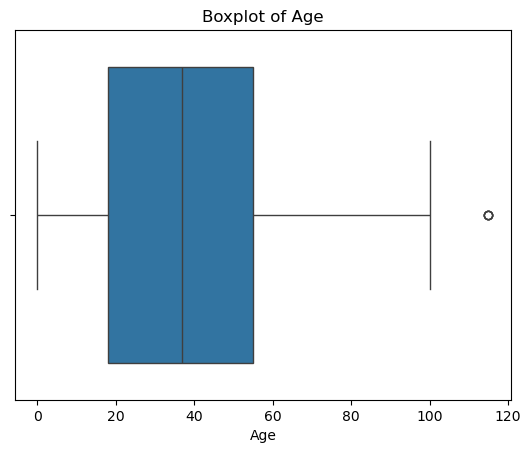

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Age'] = num_df['Age'].apply(lambda x: num_df['Age'].quantile(0.95) if x > num_df['Age'].quantile(0.95) else x)


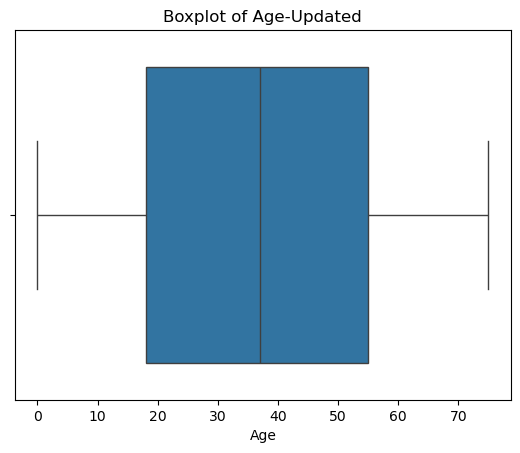

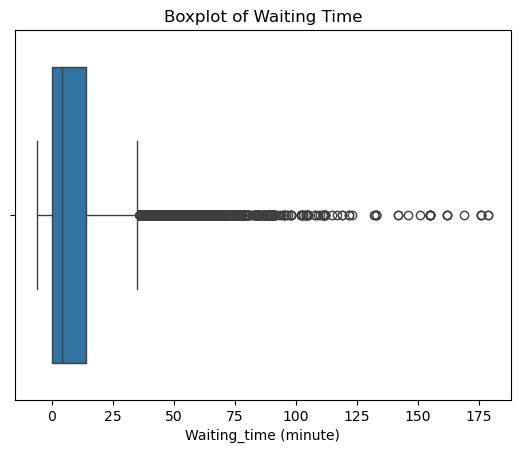

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Waiting_time (minute)'] = num_df['Waiting_time (minute)'].apply(lambda x: 0


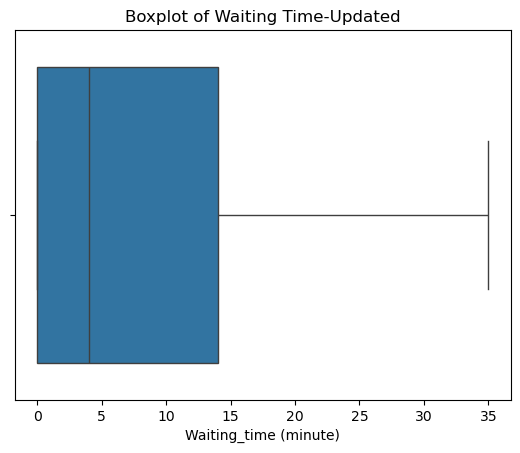

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Waiting_time_log'] = np.log1p(num_df['Waiting_time (minute)'])


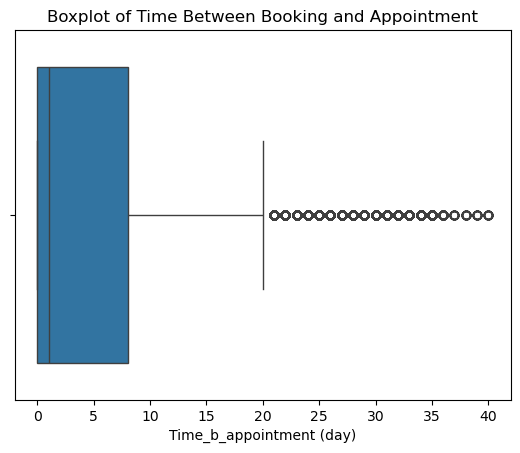

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Time_b_appointment (day)'] = num_df['Time_b_appointment (day)'].apply(lambda x: num_df['Time_b_appointment (day)'].quantile(0.95)
C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Time_b_appointment (day)_log'] = np.log1p(num_df['Time_b_appointment (day)'])


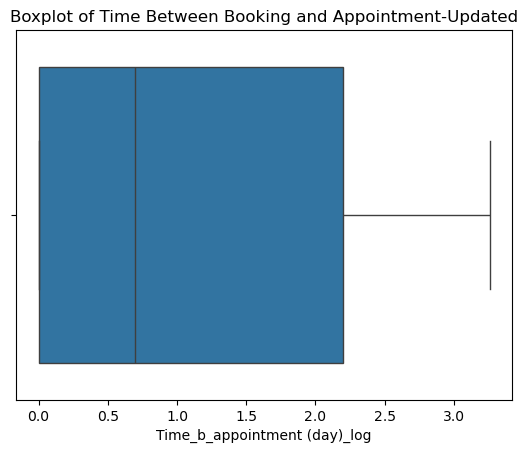

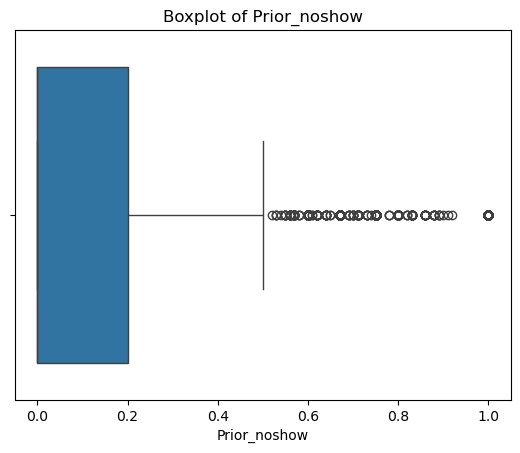

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Prior_noshow'] = num_df['Prior_noshow'].apply(lambda x: num_df['Prior_noshow'].quantile(0.95) if x>num_df['Prior_noshow'].quantile(0.95) else x)
C:\Users\prana\AppData\Local\Temp\ipykernel_8056\3925903851.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['Prior_noshow_log'] = np.log1p(num_df['Prior_noshow'])


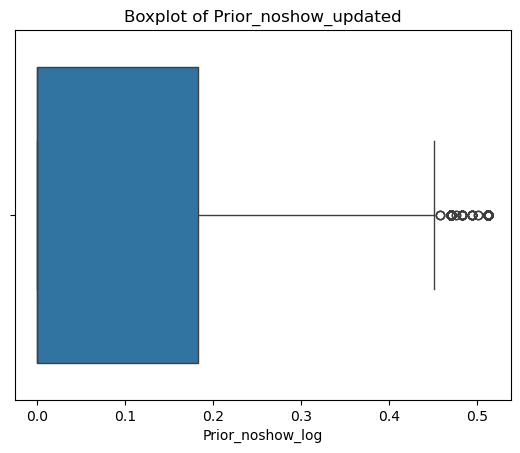

In [ ]:
sns.boxplot(x=num_df['Age'])
plt.title('Boxplot of Age')
plt.show()
num_df['Age'] = num_df['Age'].apply(lambda x: num_df['Age'].quantile(0.95) if x > num_df['Age'].quantile(0.95) else x)
Q1_age_updated = num_df['Age'].quantile(0.25)
Q3_age_updated = num_df['Age'].quantile(0.75)
IQR_age_updated = Q3_age_updated - Q1_age_updated
outliers_age_updated = num_df[(num_df['Age'] < Q1_age_updated - 1.5 * IQR_age_updated) | (num_df['Age'] > Q3_age_updated + 1.5 * IQR_age_updated)]
#print(f"Outliers in Age (Updated): {len(outliers_age_updated)}")
sns.boxplot(x=num_df['Age'])
plt.title('Boxplot of Age-Updated')
plt.show()

sns.boxplot(x=num_df['Waiting_time (minute)'])
plt.title('Boxplot of Waiting Time')
plt.show()
#sns.histplot(num_df['Waiting_time (minute)'], bins=50, kde=True)
#print("Skewness for Waiting_time (minute) : \n")
#skew(num_df['Waiting_time (minute)'])
num_df['Waiting_time (minute)'] = num_df['Waiting_time (minute)'].apply(lambda x: 0
                                                                        if x<0
                                                                        else (num_df['Waiting_time (minute)'].quantile(0.95)
                                                                              if x>num_df['Waiting_time (minute)'].quantile(0.95)
                                                                              else x))
Q1_wt_updated = num_df['Waiting_time (minute)'].quantile(0.25)
Q3_wt_updated = num_df['Waiting_time (minute)'].quantile(0.75)
IQR_wt_updated = Q3_wt_updated - Q1_wt_updated
outliers_wt_updated = num_df[(num_df['Waiting_time (minute)'] < Q1_wt_updated - 1.5 * IQR_wt_updated) | (num_df['Waiting_time (minute)'] > Q3_wt_updated + 1.5 * IQR_wt_updated)]
#print(f"Outliers in Waiting_time (minute)-Updated: {len(outliers_wt_updated)}")
sns.boxplot(x=num_df['Waiting_time (minute)'])
plt.title('Boxplot of Waiting Time-Updated')
plt.show()
num_df['Waiting_time_log'] = np.log1p(num_df['Waiting_time (minute)'])
#skew(num_df['Waiting_time_log'])

sns.boxplot(x=num_df['Time_b_appointment (day)'])
plt.title("Boxplot of Time Between Booking and Appointment")
plt.show()
num_df['Time_b_appointment (day)'] = num_df['Time_b_appointment (day)'].apply(lambda x: num_df['Time_b_appointment (day)'].quantile(0.95)
                                                                              if x > num_df['Time_b_appointment (day)'].quantile(0.95) else x)
num_df['Time_b_appointment (day)_log'] = np.log1p(num_df['Time_b_appointment (day)'])
Q1_tb_updated = num_df['Time_b_appointment (day)_log'].quantile(0.25)
Q3_tb_updated = num_df['Time_b_appointment (day)_log'].quantile(0.75)
IQR_tb_updated = Q3_tb_updated - Q1_tb_updated

outliers_tb_updated = num_df[(num_df['Time_b_appointment (day)_log'] < Q1_tb_updated - 1.5 * IQR_tb_updated) | (num_df['Time_b_appointment (day)_log'] > Q3_tb_updated + 1.5 * IQR_tb_updated)]
#print(f"Outliers in Time_b_appointment (day)-Updated: {len(outliers_tb_updated)}")
sns.boxplot(x=num_df['Time_b_appointment (day)_log'])
plt.title("Boxplot of Time Between Booking and Appointment-Updated")
plt.show()

sns.boxplot(x=num_df['Prior_noshow'])
plt.title('Boxplot of Prior_noshow')
plt.show()
num_df['Prior_noshow'] = num_df['Prior_noshow'].apply(lambda x: num_df['Prior_noshow'].quantile(0.95) if x>num_df['Prior_noshow'].quantile(0.95) else x)
num_df['Prior_noshow_log'] = np.log1p(num_df['Prior_noshow'])
Q1_pns_updated = num_df['Prior_noshow_log'].quantile(0.25)
Q3_pns_updated = num_df['Prior_noshow_log'].quantile(0.75)
IQR_pns_updated = Q3_pns_updated - Q1_pns_updated
outliers_pns_updated = num_df[(num_df['Prior_noshow_log'] < Q1_pns_updated - 1.5 * IQR_pns_updated) | (num_df['Prior_noshow_log'] > Q3_pns_updated + 1.5 * IQR_pns_updated)]
#print(f"Outliers in Prior_noshow_log-Updated: {len(outliers_pns_updated)}")
sns.boxplot(x=num_df['Prior_noshow_log'])
plt.title('Boxplot of Prior_noshow_updated')
plt.show()

In [ ]:
num_df

,Age,Month,Calling_time (hour in a day),Waiting_time (minute),Financial_aid,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Time_b_appointment (day),Prior_noshow,Waiting_time_log,Time_b_appointment (day)_log,Prior_noshow_log
0,22.0,5,7,19.0,0,0,0,0,0,1,0.0,0.0,2.995732,0.000000,0.0
1,23.0,6,13,21.0,0,0,0,0,0,1,25.0,0.0,3.091042,3.258097,0.0
2,28.0,5,16,0.0,0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.0
3,28.0,5,11,27.0,0,0,0,0,0,0,1.0,0.0,3.332205,0.693147,0.0
4,29.0,5,7,2.0,0,0,0,0,0,0,0.0,0.0,1.098612,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72602,75.0,5,14,9.0,0,0,0,0,0,1,0.0,0.0,2.302585,0.000000,0.0
72603,75.0,5,15,0.0,0,0,0,0,0,0,13.0,0.0,0.000000,2.639057,0.0
72604,75.0,5,9,1.0,0,0,0,0,0,0,0.0,0.0,0.693147,0.000000,0.0
72605,75.0,5,8,0.0,0,0,0,0,0,0,8.0,0.0,0.000000,2.197225,0.0


-------------------

## - One-hot Encoding and Integer Encoding

In [ ]:
#for cols in cat_df:
#    print("\n"f"{cols}: {cat_df[cols].unique()}")

cat_df['Show.up'] = cat_df['Show.up'].replace({'yes': 1, 'no': 0})
cat_df['Gender'] = cat_df['Gender'].replace({'F': 0, 'M': 1})
cat_df['ScheduledDay'] = cat_df['ScheduledDay'].replace('Saturday', 'Friday') #.value_counts()
cat_df['AppointmentDay'] = cat_df['AppointmentDay'].replace('Saturday', 'Friday') #.value_counts()
cat_df = pd.get_dummies(cat_df, columns = ['ScheduledDay', 'AppointmentDay'], drop_first = True, dtype = int)
categorical_cols = ['ScheduledDay', 'AppointmentDay']

day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

for cat_col in categorical_cols:
    cat_df1[cat_col] = cat_df1[cat_col].map(day_mapping)

print("Mapping for ScheduledDay and AppointmentDay:")
for day, number in day_mapping.items():
    print(f"{number}: {day}")

Mapping for ScheduledDay and AppointmentDay:
0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday


C:\Users\prana\AppData\Local\Temp\ipykernel_8056\606677501.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cat_df['Show.up'] = cat_df['Show.up'].replace({'yes': 1, 'no': 0})
C:\Users\prana\AppData\Local\Temp\ipykernel_8056\606677501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Show.up'] = cat_df['Show.up'].replace({'yes': 1, 'no': 0})
C:\Users\prana\AppData\Local\Temp\ipykernel_8056\606677501.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [ ]:
updated_df = pd.concat([num_df, cat_df, cat_df1], axis = 1)

#updated_df.to_csv('NoShowToAppointment(updated).csv', index=False)

-------------------

# (ii). Modeling

In [ ]:
new_df = pd.read_csv("NoShowToAppointment(updated).csv")

print(new_df.info())
print("\n")
print("Identifying Null-Values if any:-\n",new_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72607 entries, 0 to 72606
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           72607 non-null  float64
 1   Month                         72607 non-null  int64  
 2   Calling_time (hour in a day)  72607 non-null  int64  
 3   Waiting_time (minute)         72607 non-null  float64
 4   Financial_aid                 72607 non-null  int64  
 5   Hypertension                  72607 non-null  int64  
 6   Diabetes                      72607 non-null  int64  
 7   Alcoholism                    72607 non-null  int64  
 8   Handicap                      72607 non-null  int64  
 9   SMS_received                  72607 non-null  int64  
 10  Time_b_appointment (day)      72607 non-null  float64
 11  Prior_noshow                  72607 non-null  float64
 12  Waiting_time_log              72607 non-null  float64
 13  T

-------------------------------

## - Splitting up the Data into Training and Testing Sets

In [ ]:
X = new_df.drop(columns=['Prior_noshow', 'Waiting_time (minute)', 'Time_b_appointment (day)', 'ScheduledDay', 'AppointmentDay', 'Show.up'])
y = new_df['Show.up']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

-----------------------------------------------

## - Selecting the Best Analytical Model + Best Resampling Technique + LASSO as the Feature Importance Method.
## Best Selected model is :- XGBoost + Class Weight + LASSO

In [ ]:
la_class_weight = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)
la_class_weight.fit(X_train, y_train)

selector = SelectFromModel(la_class_weight, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

neg, pos = np.bincount(y_train)
scale_pos_weight = (neg / pos) * 1.1  # Slightly more aggressive weighting

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_selected, y_train)

y_prob = xgb_model.predict_proba(X_test_selected)[:, 1]

threshold = 0.6
y_pred = (y_prob >= threshold).astype(int)

C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\prana\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:53:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--------------------------

# (iii). Evaluation and Deployment

# ** Best Model (XGBoost + Class Weight + LASSO)

## - Classification report (Confusion Matrix and Evaluation Metrics)

Confusion Matrix:
[[ 3749   811]
 [ 5341 11882]]

Evaluation Metrics:
Threshold used: 0.6
Sensitivity (Recall): 0.6899
Specificity: 0.8221
Precision: 0.9361
G-Mean: 0.7531
Accuracy: 0.7176
AUC: 0.8420


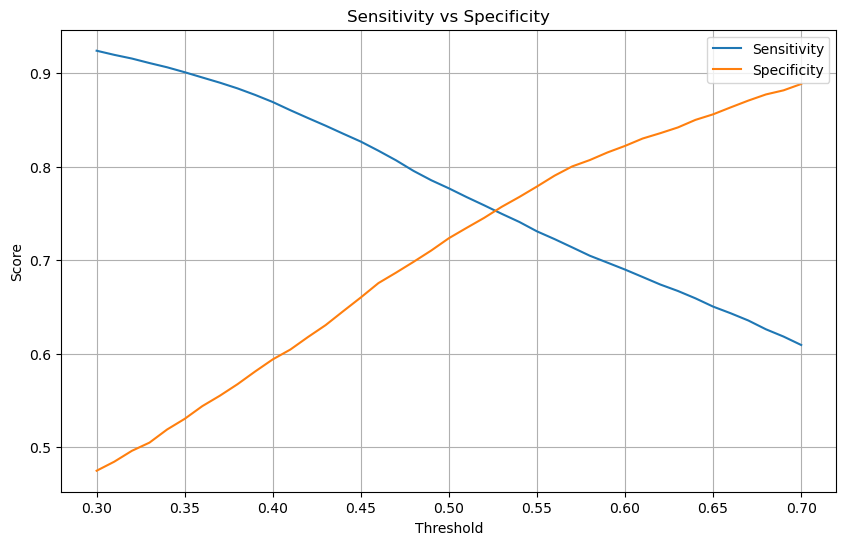

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = precision_score(y_test, y_pred)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:")
print(cm)
print("\nEvaluation Metrics:")
print(f"Threshold used: {threshold}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"G-Mean: {gmean:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

thresholds = np.arange(0.3, 0.71, 0.01)
sensitivities = []
specificities = []

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    tn_, fp_, fn_, tp_ = confusion_matrix(y_test, preds).ravel()
    sensitivities.append(tp_ / (tp_ + fn_))
    specificities.append(tn_ / (tn_ + fp_))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivities, label='Sensitivity')
plt.plot(thresholds, specificities, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity vs Specificity')
plt.legend()
plt.grid(True)
plt.show()

----------------------------------

## - Extract Non-Zero LASSO Coefficients and

## - Creating a Bar Plot of LASSO Coefficients


LASSO Feature Summary:
                         Feature  Coefficient  \
0   Time_b_appointment (day)_log     0.426285   
1                          Month     0.290393   
2          ScheduledDay_Thursday     0.057286   
3        AppointmentDay_Thursday     0.018914   
4         ScheduledDay_Wednesday     0.017941   
5           ScheduledDay_Tuesday     0.012314   
6            ScheduledDay_Monday     0.011531   
7                   SMS_received     0.009640   
8                            Age     0.005697   
9       AppointmentDay_Wednesday    -0.004146   
10  Calling_time (hour in a day)    -0.009710   
11                        Gender    -0.042116   
12                  Hypertension    -0.050976   
13        AppointmentDay_Tuesday    -0.061520   
14         AppointmentDay_Monday    -0.084836   
15                    Alcoholism    -0.130429   
16                      Diabetes    -0.131942   
17                      Handicap    -0.186488   
18                 Financial_aid    -0.195039

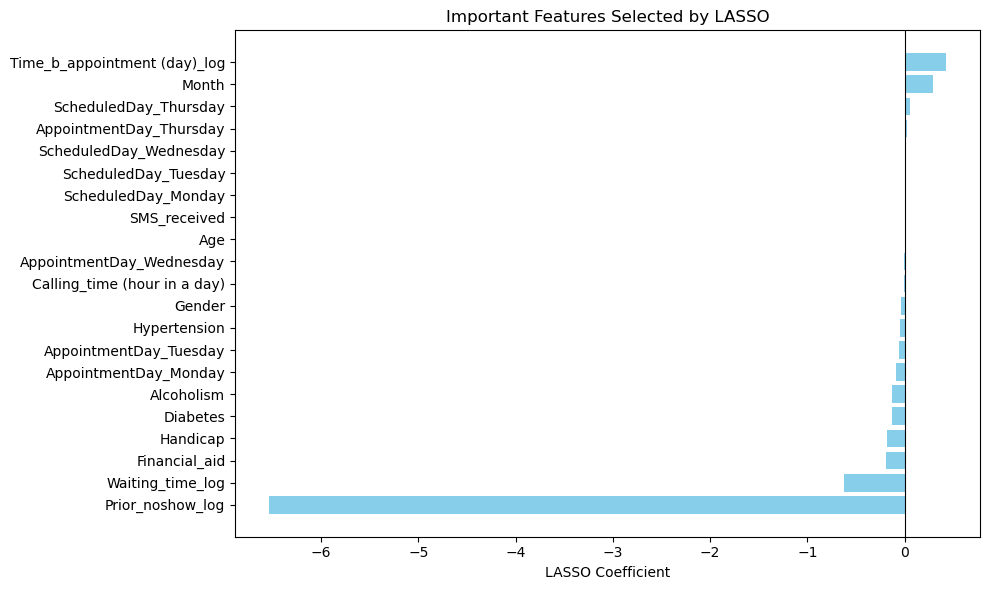

In [ ]:
impFeatures_CWLA = X_train.columns
coefs_CWLA = la_class_weight.coef_[0]

cwla_df = pd.DataFrame({
    'Feature': impFeatures_CWLA,
    'Coefficient': coefs_CWLA
})
cwla_df = cwla_df[cwla_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False).reset_index(drop=True)

cwla_df['Interpretation'] = cwla_df['Coefficient'].apply(lambda x: 'Higher value increases likelihood of showing up' if x > 0 else 'Higher value increases likelihood of no-show')

print("\nLASSO Feature Summary:")
print(cwla_df)

# Bar plot of LASSO coefficients
plt.figure(figsize=(10, 6))
plt.barh(cwla_df['Feature'], cwla_df['Coefficient'], color='skyblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('LASSO Coefficient')
plt.title('Important Features Selected by LASSO')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

-------------------------------------

## - Summary Stats + Plots

In [ ]:
# Selecting the important features identified from LASSO
important_features = ['Time_b_appointment (day)_log', 'Month', 'ScheduledDay_Thursday', 'AppointmentDay_Thursday',
                      'ScheduledDay_Wednesday', 'ScheduledDay_Tuesday', 'ScheduledDay_Monday', 'SMS_received',
                      'Age', 'AppointmentDay_Wednesday', 'Calling_time (hour in a day)', 'Gender',
                      'Hypertension', 'AppointmentDay_Tuesday', 'AppointmentDay_Monday', 'Alcoholism', 'Diabetes',
                      'Handicap', 'Financial_aid', 'Waiting_time_log', 'Prior_noshow_log']

important_data = new_df[important_features]

summary_stats = important_data.describe().transpose()
#print(summary_stats)
summary_stats

,count,mean,std,min,25%,50%,75%,max
Time_b_appointment (day)_log,72607.0,1.143040,1.202827,0.0,0.0,0.693147,2.197225,3.258097
Month,72607.0,5.207019,0.470888,4.0,5.0,5.000000,5.000000,6.000000
ScheduledDay_Thursday,72607.0,0.163001,0.369369,0.0,0.0,0.000000,0.000000,1.000000
AppointmentDay_Thursday,72607.0,0.153718,0.360681,0.0,0.0,0.000000,0.000000,1.000000
ScheduledDay_Wednesday,72607.0,0.220309,0.414458,0.0,0.0,0.000000,0.000000,1.000000
ScheduledDay_Tuesday,72607.0,0.231934,0.422070,0.0,0.0,0.000000,0.000000,1.000000
ScheduledDay_Monday,72607.0,0.209525,0.406973,0.0,0.0,0.000000,0.000000,1.000000
SMS_received,72607.0,0.313634,0.463973,0.0,0.0,0.000000,1.000000,1.000000
Age,72607.0,36.936370,22.126267,0.0,18.0,37.000000,55.000000,75.000000
AppointmentDay_Wednesday,72607.0,0.234523,0.423703,0.0,0.0,0.000000,0.000000,1.000000


C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Show.up', y='Time_b_appointment (day)_log', data=new_df, palette='Set2')


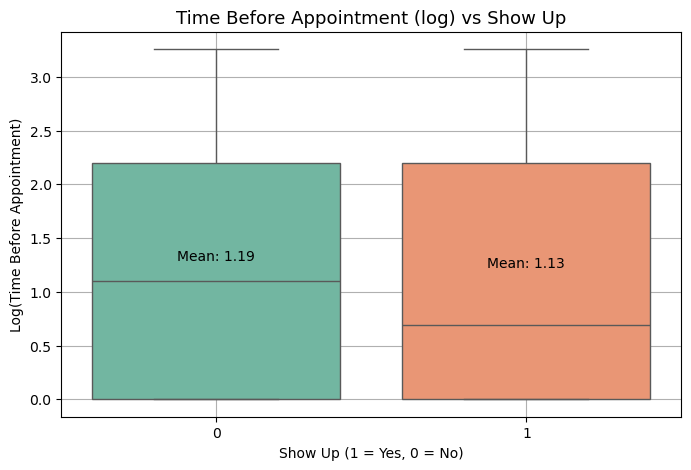

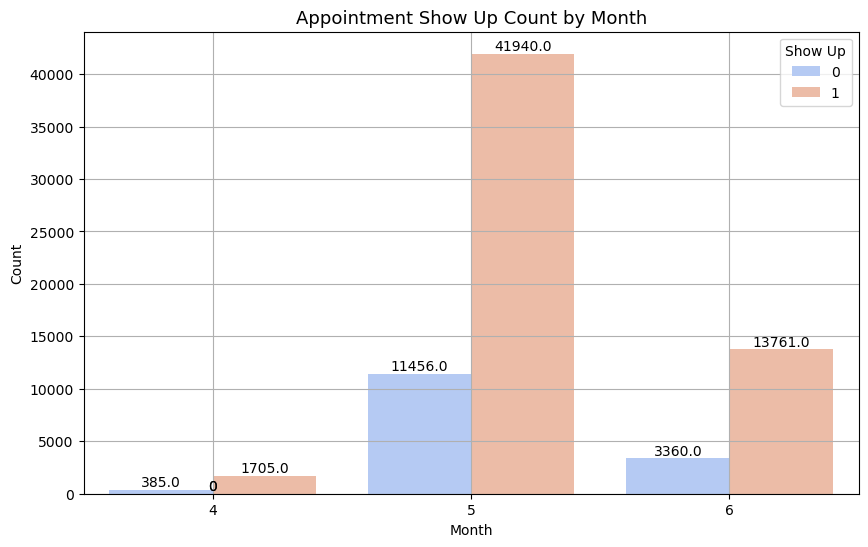

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group, x='ScheduledDay_Thursday', y='Show.up', palette='pastel')


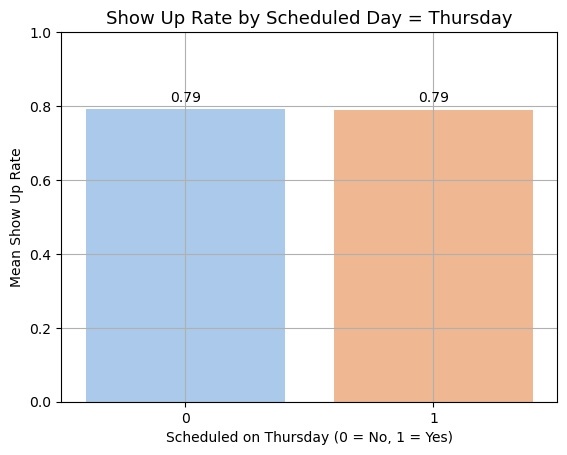

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Show.up', y='Age', data=new_df, palette='Blues')


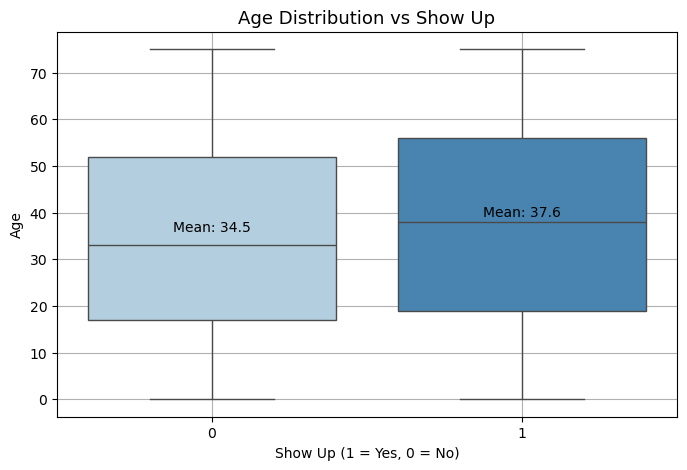

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group, x='SMS_received', y='Show.up', palette='muted')


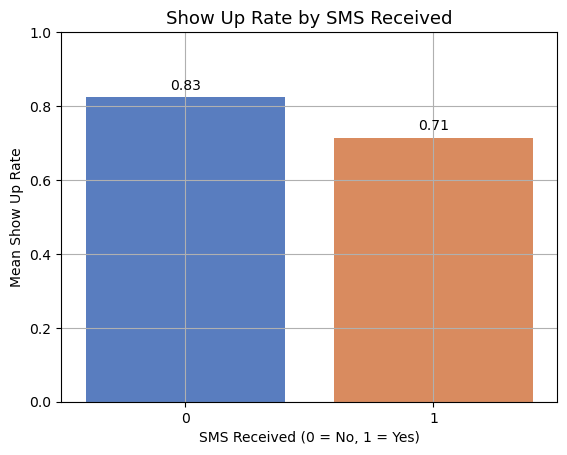

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Show.up', y='Waiting_time_log', data=new_df, palette='OrRd')


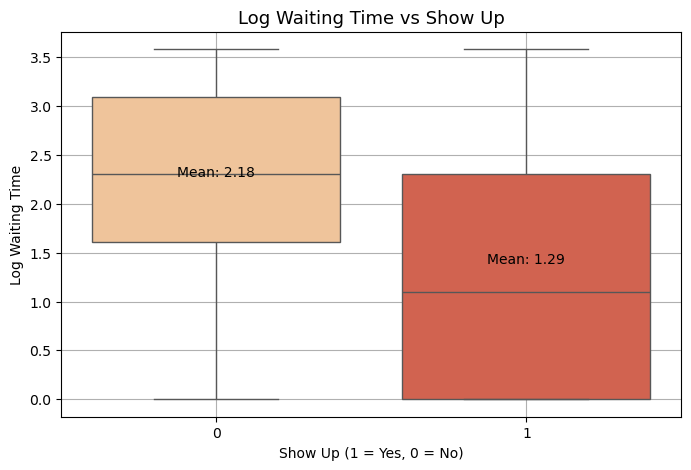

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Show.up', y='Prior_noshow_log', data=new_df, palette='Greens')


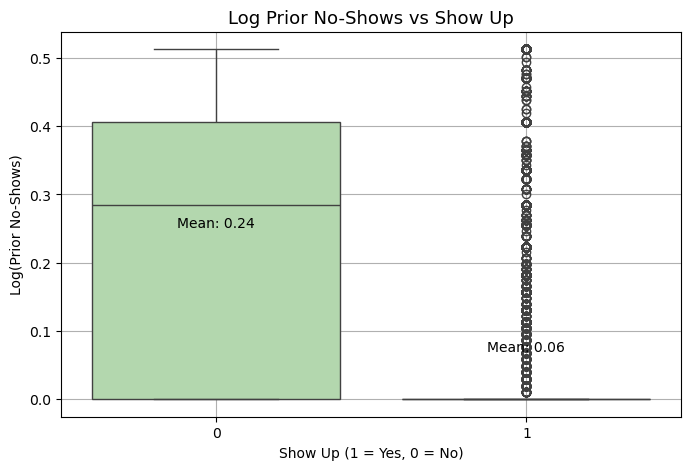

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group, x='Financial_aid', y='Show.up', palette='cool')


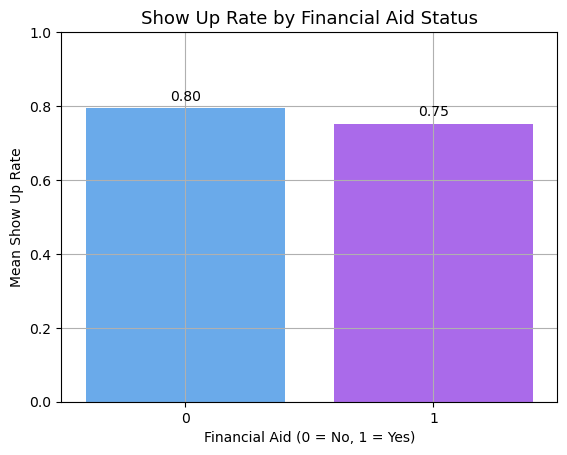

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=group, x='Gender', y='Show.up', palette='Set3')


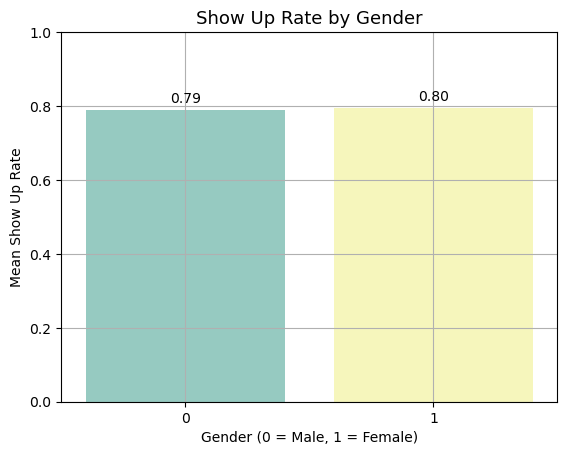

C:\Users\prana\AppData\Local\Temp\ipykernel_8056\2198244111.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Show.up', y='Calling_time (hour in a day)', data=new_df, palette='Purples')


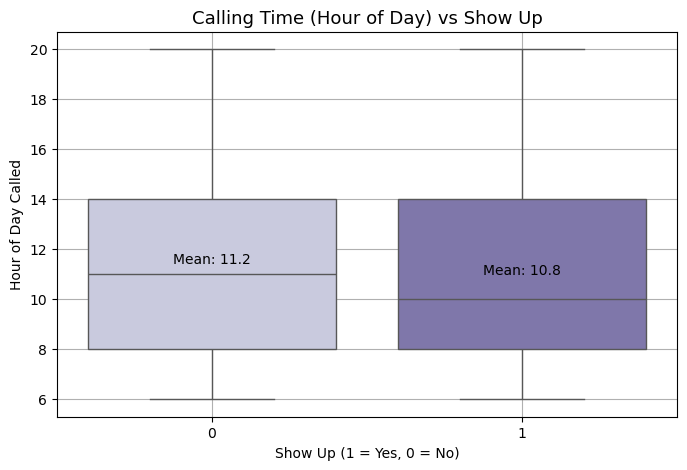

In [ ]:
# Time_b_appointment (day)_log
plt.figure(figsize=(8, 5))
sns.boxplot(x='Show.up', y='Time_b_appointment (day)_log', data=new_df, palette='Set2')
plt.title('Time Before Appointment (log) vs Show Up', fontsize=13)
plt.xlabel('Show Up (1 = Yes, 0 = No)')
plt.ylabel('Log(Time Before Appointment)')

means = new_df.groupby('Show.up')['Time_b_appointment (day)_log'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.1, f'Mean: {mean:.2f}', ha='center', color='black')

plt.grid(True)
plt.show()

#Month
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=new_df, x='Month', hue='Show.up', palette='coolwarm')
plt.title('Appointment Show Up Count by Month', fontsize=13)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Show Up')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height), ha='center', va='bottom')

plt.grid(True)
plt.show()

#ScheduledDay_Thursday
group = new_df.groupby('ScheduledDay_Thursday')['Show.up'].mean().reset_index()
ax = sns.barplot(data=group, x='ScheduledDay_Thursday', y='Show.up', palette='pastel')
plt.title('Show Up Rate by Scheduled Day = Thursday', fontsize=13)
plt.xlabel('Scheduled on Thursday (0 = No, 1 = Yes)')
plt.ylabel('Mean Show Up Rate')
plt.ylim(0, 1)

for i, row in group.iterrows():
    ax.text(i, row['Show.up'] + 0.02, f"{row['Show.up']:.2f}", ha='center')

plt.grid(True)
plt.show()

#Age
plt.figure(figsize=(8, 5))
sns.boxplot(x='Show.up', y='Age', data=new_df, palette='Blues')
plt.title('Age Distribution vs Show Up', fontsize=13)
plt.xlabel('Show Up (1 = Yes, 0 = No)')
plt.ylabel('Age')

means = new_df.groupby('Show.up')['Age'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 1.5, f'Mean: {mean:.1f}', ha='center', color='black')

plt.grid(True)
plt.show()

# SMS_received
group = new_df.groupby('SMS_received')['Show.up'].mean().reset_index()
ax = sns.barplot(data=group, x='SMS_received', y='Show.up', palette='muted')
plt.title('Show Up Rate by SMS Received', fontsize=13)
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Mean Show Up Rate')
plt.ylim(0, 1)

for i, row in group.iterrows():
    ax.text(i, row['Show.up'] + 0.02, f"{row['Show.up']:.2f}", ha='center')

plt.grid(True)
plt.show()

#Waiting_time_log
plt.figure(figsize=(8, 5))
sns.boxplot(x='Show.up', y='Waiting_time_log', data=new_df, palette='OrRd')
plt.title('Log Waiting Time vs Show Up', fontsize=13)
plt.xlabel('Show Up (1 = Yes, 0 = No)')
plt.ylabel('Log Waiting Time')

means = new_df.groupby('Show.up')['Waiting_time_log'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.1, f'Mean: {mean:.2f}', ha='center', color='black')

plt.grid(True)
plt.show()

#Prior_noshow_log
plt.figure(figsize=(8, 5))
sns.boxplot(x='Show.up', y='Prior_noshow_log', data=new_df, palette='Greens')
plt.title('Log Prior No-Shows vs Show Up', fontsize=13)
plt.xlabel('Show Up (1 = Yes, 0 = No)')
plt.ylabel('Log(Prior No-Shows)')

means = new_df.groupby('Show.up')['Prior_noshow_log'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.01, f'Mean: {mean:.2f}', ha='center', color='black')

plt.grid(True)
plt.show()

#Financial_aid
group = new_df.groupby('Financial_aid')['Show.up'].mean().reset_index()
ax = sns.barplot(data=group, x='Financial_aid', y='Show.up', palette='cool')
plt.title('Show Up Rate by Financial Aid Status', fontsize=13)
plt.xlabel('Financial Aid (0 = No, 1 = Yes)')
plt.ylabel('Mean Show Up Rate')
plt.ylim(0, 1)

for i, row in group.iterrows():
    ax.text(i, row['Show.up'] + 0.02, f"{row['Show.up']:.2f}", ha='center')

plt.grid(True)
plt.show()

#Gender
group = new_df.groupby('Gender')['Show.up'].mean().reset_index()
ax = sns.barplot(data=group, x='Gender', y='Show.up', palette='Set3')
plt.title('Show Up Rate by Gender', fontsize=13)
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Mean Show Up Rate')
plt.ylim(0, 1)

for i, row in group.iterrows():
    ax.text(i, row['Show.up'] + 0.02, f"{row['Show.up']:.2f}", ha='center')

plt.grid(True)
plt.show()

#Calling_time (hour in a day)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Show.up', y='Calling_time (hour in a day)', data=new_df, palette='Purples')
plt.title('Calling Time (Hour of Day) vs Show Up', fontsize=13)
plt.xlabel('Show Up (1 = Yes, 0 = No)')
plt.ylabel('Hour of Day Called')

means = new_df.groupby('Show.up')['Calling_time (hour in a day)'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.1f}', ha='center', color='black')

plt.grid(True)
plt.show()